# Finding the inflection point of intensities

Exponential growth starts at x = 7466, y = 95.7080911228634


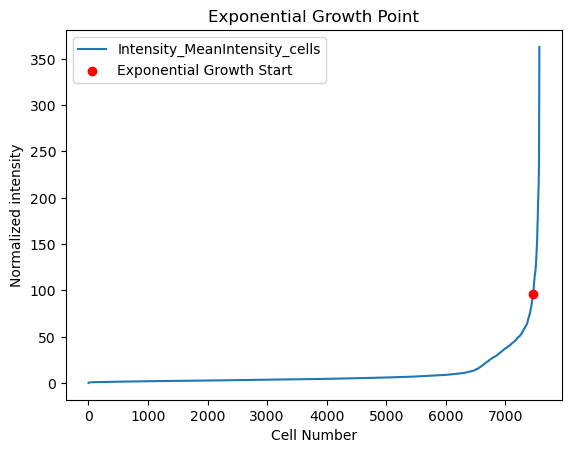

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your data from the Excel file
data = pd.read_excel('/Users/pegaheizad/Desktop/Ghosh_lab/normalized_intensities.xlsx')

# Extract x (cell_num) and y (Intensity_MeanIntensity_cells) values
x = data['Cell_num'].values
y = data['mean_intensity_normalized'].values

# Calculate the first derivative (slope)
dy = np.gradient(y, x)

# Calculate the second derivative (rate of change of the slope)
ddy = np.gradient(dy, x)

# Set the threshold for the second derivative to detect exponential growth
threshold = np.mean(ddy) + 2 * np.std(ddy)

# Filter the data to only include points after x = 2000
valid_indices = np.where(x > 2000)

# Apply the threshold condition on the filtered second derivative data
exponential_growth_index = valid_indices[0][np.where(ddy[valid_indices] > threshold)[0][0]]

# Output the point of exponential growth
print(f"Exponential growth starts at x = {x[exponential_growth_index]}, y = {y[exponential_growth_index]}")

# Plot the original data and mark the point of exponential growth
plt.plot(x, y, label='Intensity_MeanIntensity_cells')
plt.scatter(x[exponential_growth_index], y[exponential_growth_index], color='red', label='Exponential Growth Start', zorder=5)
plt.xlabel('Cell Number')
plt.ylabel('Normalized intensity')
plt.title('Exponential Growth Point')
plt.legend()
plt.show()


The curve stops being linear at Cell_num: 7405


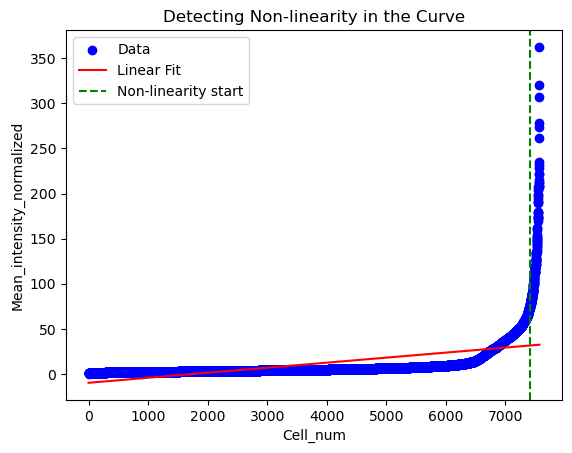

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
data = pd.read_excel('/Users/pegaheizad/Desktop/Ghosh_lab/normalized_intensities.xlsx')

# Extract x (Cell_num) and y (Mean_intensity_normalized) values
x = data['Cell_num'].values.reshape(-1, 1)
y = data['mean_intensity_normalized'].values

# Perform linear regression
linear_model = LinearRegression()
linear_model.fit(x, y)

# Get predicted values (y_pred) from the linear model
y_pred = linear_model.predict(x)

# Calculate residuals (difference between actual and predicted values)
residuals = np.abs(y - y_pred)

# Set a threshold for when the residuals indicate a deviation from linearity
threshold = np.mean(residuals) + 2 * np.std(residuals)

# Find the point where the residuals first exceed the threshold
non_linear_index = np.where(residuals > threshold)[0][0]

# Print the result
print(f'The curve stops being linear at Cell_num: {x[non_linear_index][0]}')

# Plot the data, linear fit, and the point where non-linearity starts
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, y_pred, label='Linear Fit', color='red')
plt.axvline(x=x[non_linear_index][0], color='green', linestyle='--', label='Non-linearity start')
plt.xlabel('Cell_num')
plt.ylabel('Mean_intensity_normalized')
plt.legend()
plt.title('Detecting Non-linearity in the Curve')
plt.show()
